============== 1/16 ==============
epoch:0 | 0.105 - 0.092
epoch:1 | 0.097 - 0.104


F:\Pycharm_workspace\DeepLearningFromScratch\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
F:\Pycharm_workspace\DeepLearningFromScratch\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.087
epoch:3 | 0.097 - 0.119
epoch:4 | 0.097 - 0.146
epoch:5 | 0.097 - 0.17
epoch:6 | 0.097 - 0.18
epoch:7 | 0.097 - 0.203
epoch:8 | 0.097 - 0.226
epoch:9 | 0.097 - 0.247
epoch:10 | 0.097 - 0.284
epoch:11 | 0.097 - 0.299
epoch:12 | 0.097 - 0.318
epoch:13 | 0.097 - 0.326
epoch:14 | 0.097 - 0.346
epoch:15 | 0.097 - 0.364
epoch:16 | 0.097 - 0.385
epoch:17 | 0.097 - 0.393
epoch:18 | 0.097 - 0.424
epoch:19 | 0.097 - 0.43
============== 2/16 ==============
epoch:0 | 0.117 - 0.088
epoch:1 | 0.097 - 0.101

C:\Users\admin\AppData\Local\Temp\ipykernel_28484\377046873.py:86: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')



epoch:2 | 0.097 - 0.129
epoch:3 | 0.097 - 0.155
epoch:4 | 0.097 - 0.186
epoch:5 | 0.097 - 0.196
epoch:6 | 0.097 - 0.212
epoch:7 | 0.097 - 0.231
epoch:8 | 0.097 - 0.256
epoch:9 | 0.097 - 0.284
epoch:10 | 0.097 - 0.309
epoch:11 | 0.097 - 0.329
epoch:12 | 0.097 - 0.358
epoch:13 | 0.097 - 0.387
epoch:14 | 0.097 - 0.404
epoch:15 | 0.097 - 0.423
epoch:16 | 0.097 - 0.437
epoch:17 | 0.097 - 0.453
epoch:18 | 0.097 - 0.468
epoch:19 | 0.097 - 0.488
============== 3/16 ==============
epoch:0 | 0.111 - 0.078
epoch:1 | 0.352 - 0.086
epoch:2 | 0.477 - 0.123
epoch:3 | 0.577 - 0.17
epoch:4 | 0.65 - 0.226
epoch:5 | 0.69 - 0.264
epoch:6 | 0.752 - 0.31
epoch:7 | 0.791 - 0.343
epoch:8 | 0.829 - 0.369
epoch:9 | 0.853 - 0.401
epoch:10 | 0.876 - 0.427
epoch:11 | 0.897 - 0.455
epoch:12 | 0.9 - 0.483
epoch:13 | 0.913 - 0.491
epoch:14 | 0.925 - 0.512
epoch:15 | 0.941 - 0.534
epoch:16 | 0.952 - 0.56
epoch:17 | 0.956 - 0.575
epoch:18 | 0.965 - 0.605
epoch:19 | 0.971 - 0.616
============== 4/16 ==============
epoc

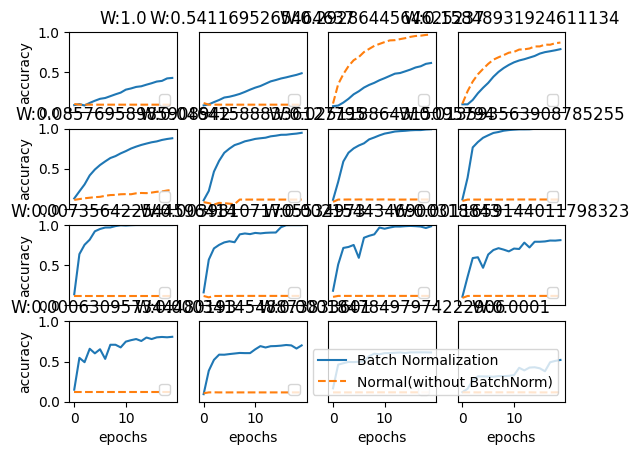

In [2]:
# coding: utf-8
# batch_norm_test.py
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 减少学习数据
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 3.绘制图形==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()